In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color':  'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

In [ ]:
df_train = pd.read_csv("train.csv")
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

#Data Preprocessing

In [ ]:
#menghitung nilai null
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
#menghitung nilai null
df_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [ ]:
# detect duplicated records data train
df_train[df_train.duplicated(subset = None, keep = False)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [ ]:
# detect duplicated records data test
df_test[df_test.duplicated(subset = None, keep = False)]

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls


In [ ]:
#mengetahui nilai uniq pada data kategorik
df_train['international_plan'].unique()
df_train['voice_mail_plan'].unique()
df_train['churn'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
#mengetahui kategorik dan numerik data train
categorical=df_train.select_dtypes(include='object').columns.tolist()
numeric=df_train.dtypes[df_train.dtypes!=object].keys().tolist() # result of dtypes is Series, so we use keys(), not columns
print('Categorical Features:',categorical,'\nNumerical Features:',numeric,sep='\n')

Categorical Features:
['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

Numerical Features:
['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [ ]:
#mengetahui kategorik dan numerik data test
categorical_test=df_test.select_dtypes(include='object').columns.tolist()
numeric_test=df_test.dtypes[df_test.dtypes!=object].keys().tolist() # result of dtypes is Series, so we use keys(), not columns
print('Categorical Features:',categorical_test,'\nNumerical Features:',numeric_test,sep='\n')

Categorical Features:
['state', 'area_code', 'international_plan', 'voice_mail_plan']

Numerical Features:
['id', 'account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [ ]:
#mengecek outlier data training
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))
for col in ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 
             'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 
             'total_eve_charge', 'total_night_minutes', 'total_night_calls', 
             'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 
             'total_intl_charge', 'number_customer_service_calls']:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries
    
df_train = df_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3515


In [ ]:
#mengecek outlier data test
print(f'Jumlah baris sebelum memfilter outlier: {len(df_test)}')

filtered_entries = np.array([True] * len(df_test))
for col in ['id','account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 
             'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 
             'total_eve_charge', 'total_night_minutes', 'total_night_calls', 
             'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 
             'total_intl_charge', 'number_customer_service_calls']:
    Q1 = df_test[col].quantile(0.25)
    Q3 = df_test[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_test[col] >= low_limit) & (df_test[col] <= high_limit)) & filtered_entries
    
df_test = df_test[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_test)}')

Jumlah baris sebelum memfilter outlier: 750
Jumlah baris setelah memfilter outlier: 619


In [ ]:
#mengetahui jumlah nilai dari data kategorik train
print(df_train.international_plan.value_counts())
print('/n')
print(df_train.voice_mail_plan.value_counts())
print('/n')
print(df_train.churn.value_counts())

no     3195
yes     320
Name: international_plan, dtype: int64
/n
no     2640
yes     875
Name: voice_mail_plan, dtype: int64
/n
no     3147
yes     368
Name: churn, dtype: int64


In [ ]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000,3515.000000
mean,99.566145,6.939687,180.081195,99.818208,30.614370,200.424780,100.026743,17.036327,200.859431,99.891038,9.038808,10.308791,4.257468,2.783898,1.303556
std,39.130022,12.534587,52.636074,19.295141,8.948063,48.932659,19.438500,4.159313,48.584763,19.398227,2.186334,2.563978,2.074590,0.692227,0.975672
min,1.000000,0.000000,34.500000,48.000000,5.870000,64.300000,47.000000,5.470000,67.700000,46.000000,3.050000,3.300000,1.000000,0.890000,0.000000
25%,73.000000,0.000000,143.600000,87.000000,24.410000,166.850000,87.000000,14.185000,167.550000,87.000000,7.540000,8.600000,3.000000,2.320000,1.000000
50%,99.000000,0.000000,180.200000,100.000000,30.630000,200.900000,100.000000,17.080000,201.000000,100.000000,9.050000,10.400000,4.000000,2.810000,1.000000
75%,127.000000,0.000000,216.000000,113.000000,36.720000,233.700000,113.000000,19.860000,235.000000,113.000000,10.580000,12.000000,5.000000,3.240000,2.000000
max,204.000000,40.000000,325.400000,152.000000,55.320000,335.000000,154.000000,28.480000,333.500000,153.000000,15.010000,17.200000,10.000000,4.640000,3.000000


#EDA

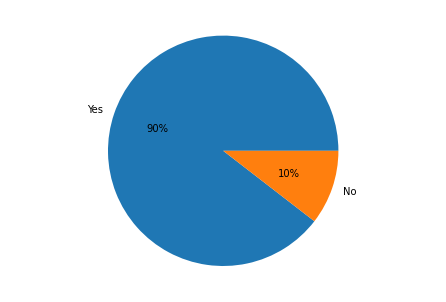

In [ ]:
#pRESENTASE CHURN
#Membuat figur plot
fig = plt.figure()
#Membuat sumbu plot
ax = fig.add_axes([0,0,1,1])
#Mengubah batas sumbu x atau y sehingga memiliki panjang yang sama
ax.axis('equal')
#Membuat Label pie chart
labels = ['Yes','No']
#Menghitung banyaknya unik dari kolom Churn dengan value_counts()
churn = df_train.churn.value_counts()
#Membuat bentuk pie chart
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


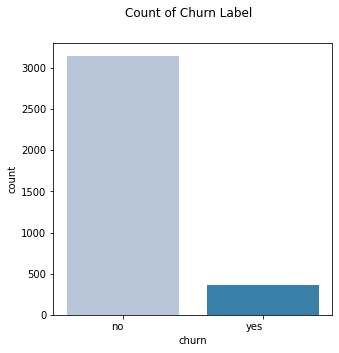

In [ ]:
# count of each churn class label (masuk ke EDA)
plt.figure(figsize = (5, 5))
ax = sns.countplot(df_train['churn'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, ha = "right")
plt.suptitle("Count of Churn Label")
plt.show()

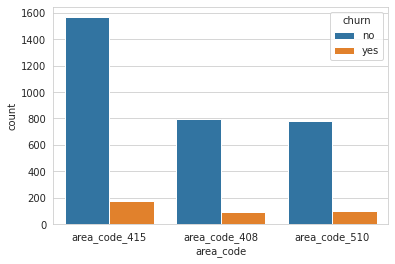

In [ ]:
#Membuat subplot
sns.set_style('whitegrid')
#membuat plot dengan jumlah pengamatan di setiap bin kategorik variable dengan countplot()
sns.countplot(x='area_code',hue='churn',data=df_train)

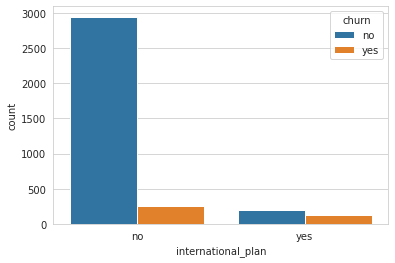

In [ ]:
#Membuat subplot
sns.set_style('whitegrid')
#membuat plot dengan jumlah pengamatan di setiap bin kategorik variable dengan countplot()
sns.countplot(x='international_plan',hue='churn',data=df_train)

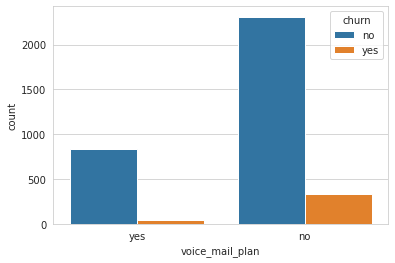

In [ ]:
#Membuat subplot
sns.set_style('whitegrid')
sns.countplot(x='voice_mail_plan',hue='churn',data=df_train)

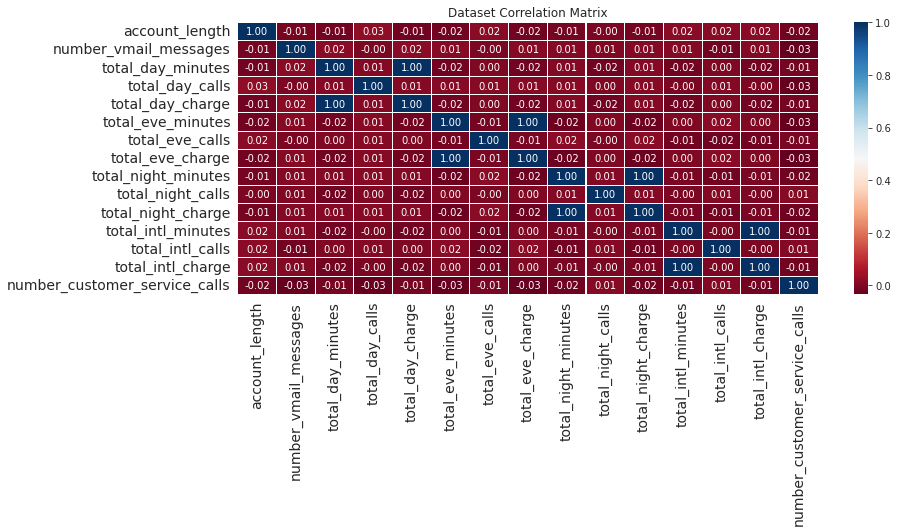

In [ ]:
#heatmap
# plot correlation matrix heatmap
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df_train.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title('Dataset Correlation Matrix')
fig.show() 

In [ ]:
Num_cols = ['total_day_minutes' ,'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge' ]
print('nums numericals columns are {}'.format(Num_cols))

nums numericals columns are ['total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

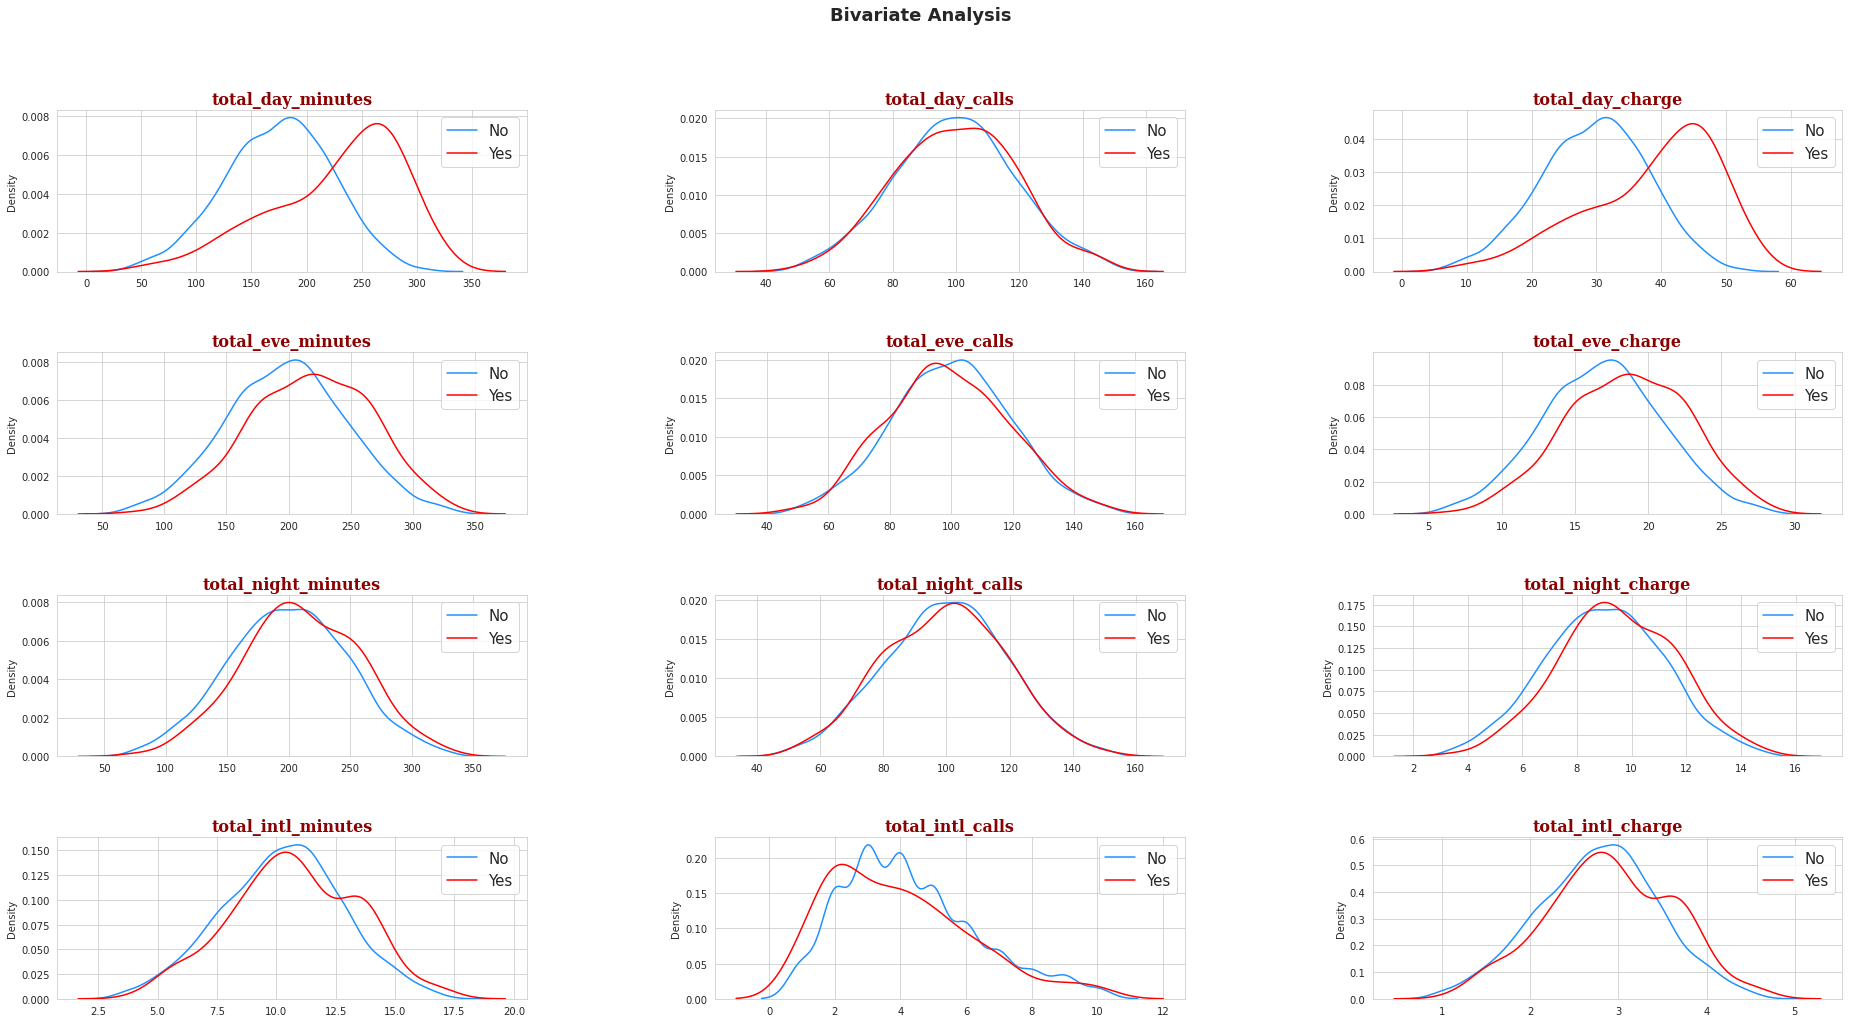

In [ ]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Bivariate Analysis', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(Num_cols):
    a = fig.add_subplot(6, 3, i+1)
    
    sns.distplot(x =df_train[df_train['churn']=='no'][col],  color='dodgerblue' , ax=a ,  hist =False)
    sns.distplot(x =df_train[df_train['churn']=='yes'][col],  color='red' , ax=a , hist =False) 
    a.set_title(col , fontdict=axtitle_dict)    
    labels = ['No' , 'Yes']
    a.legend( labels  , fontsize = 15)

#Klasifikasi

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels data train.
df_train['international_plan']= label_encoder.fit_transform(df_train['international_plan'])
df_train['voice_mail_plan']= label_encoder.fit_transform(df_train['voice_mail_plan'])
df_train['churn']= label_encoder.fit_transform(df_train['churn'])

#encode label data test
df_test['international_plan']= label_encoder.fit_transform(df_test['international_plan'])
df_test['voice_mail_plan']= label_encoder.fit_transform(df_test['voice_mail_plan'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

#Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df_train.drop(['churn', 'account_length', 'state', 'area_code', 'number_vmail_messages', 'number_customer_service_calls'], axis = 1)
y= df_train['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_fit = rf_model.fit(X_train, y_train)

Cross Validation Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rfc_accuracy = cross_val_score(rf_model, X_test, y_test,cv = 10).mean()
rfc_f1_score = cross_val_score(rf_model, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
rfc_recall = cross_val_score(rf_model, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
print('rfc_accuracy:',rfc_accuracy,
       '\nrfc_f1_score:',rfc_f1_score,
       '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.9274044265593562 
rfc_f1_score: 0.9108819180185967 
rfc_recall: 0.9316700201207244


In [ ]:
print('Training set score: {:.4f}'.format(rf_fit.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_fit.score(X_test, y_test)))

#prediksi churn
y_pred_rfc = rf_model.predict(X_test)

Training set score: 1.0000
Test set score: 0.9602


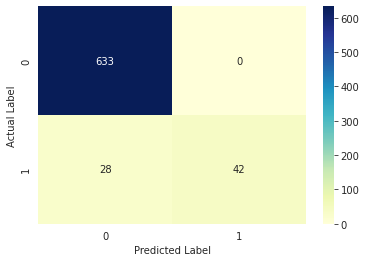

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_rfc), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

In [ ]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred_rfc), sep="\n")
print(classification_report(y_test, y_pred_rfc))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, rf_model.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_rfc))

Confusion Matrix:
[633   0]
[28 42]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       633
           1       1.00      0.60      0.75        70

    accuracy                           0.96       703
   macro avg       0.98      0.80      0.86       703
weighted avg       0.96      0.96      0.96       703

Train Accuracy:  1.0
Test Accuracy:  0.9601706970128022


KNN

In [ ]:
# using k-Nearest Neighbour (KNN) classifier
# choose 7 as the optimal number of clusters
classifierKNN = KNeighborsClassifier(n_neighbors = 15)
classifierKNN.fit(X_train, y_train)

# using Euclidean distance metric
classifierKNN.effective_metric_

'euclidean'

In [ ]:
y_predKNN = classifierKNN.predict(X_test)

In [ ]:
# for k-Nearest Neighbours model
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predKNN))
print(classification_report(y_test, y_predKNN))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierKNN.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predKNN))

[[628   5]
 [ 47  23]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       633
           1       0.82      0.33      0.47        70

    accuracy                           0.93       703
   macro avg       0.88      0.66      0.71       703
weighted avg       0.92      0.93      0.91       703

Train Accuracy:  0.922475106685633
Test Accuracy:  0.9260312944523471


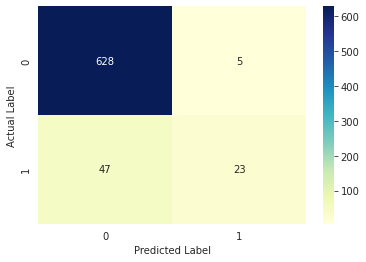

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_predKNN), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

Cross Validation KNN

In [ ]:
knn_accuracy = cross_val_score(classifierKNN, X_test, y_test,cv = 10).mean()
knn_f1_score = cross_val_score(classifierKNN, X_test, y_test,cv = 10,scoring='f1_weighted').mean()
knn_recall = cross_val_score(classifierKNN, X_test, y_test,cv = 10,scoring='recall_weighted').mean()
print('knn_accuracy:',knn_accuracy,
       '\nknn_f1_score:',knn_f1_score,
       '\nknn_recall:',knn_recall)

knn_accuracy: 0.9188732394366198 
knn_f1_score: 0.8957718402956691 
knn_recall: 0.9188732394366198


#Prediksi Label data Test

Random Forest

In [ ]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
df_test.drop(['state', 'area_code', 'account_length', 'number_vmail_messages', 'number_customer_service_calls'], axis=1,inplace=True)

In [ ]:
#encode label data test
df_test['international_plan']= label_encoder.fit_transform(df_test['international_plan'])
df_test['voice_mail_plan']= label_encoder.fit_transform(df_test['voice_mail_plan'])

In [ ]:
y_predict_churn = rf_model.predict(df_test)
predicted = pd.DataFrame(y_predict_churn)
predicted.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
print(y_predict_churn)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
output_pred = pd.DataFrame({'Customer_Id ': df_test['id'].values, 'churn ': y_predict_churn})
output_pred.head(20)

,Customer_Id,churn
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [ ]:
output_pred.to_csv('submission_pred.csv', sep='\t', index = False)
print("File's saved!")

File's saved!


#Binned
tujuannya untuk memberikan chasback buat yg churn aja

In [ ]:
#ini 2 dimensi, kalo diujungnya ,1 maka mendekati 1 kyk 0.9 tapi kalo yg diujung ,0 maka mendekati 0
#y_pred_proba = classifierNB.predict_proba(X_test)[::,1]

#bins = [0, 0.1,0.25, 0.5,0.75, 1]
#binned = pd.cut(y_pred_proba, bins)


In [ ]:
#print(binned)

[(0.0, 0.1], (0.0, 0.1], (0.0, 0.1], (0.0, 0.1], (0.0, 0.1], ..., (0.0, 0.1], (0.0, 0.1], (0.25, 0.5], (0.0, 0.1], (0.0, 0.1]]
Length: 703
Categories (5, interval[float64, right]): [(0.0, 0.1] < (0.1, 0.25] < (0.25, 0.5] < (0.5, 0.75] <
                                           (0.75, 1.0]]


In [ ]:
#pemberian label
#bins = [0,0.25, 0.5,0.75, 1]
#labels = ['low','medium low','medium high','high']

#binned = pd.cut(y_pred_proba, bins,labels=labels).value_counts()


In [ ]:
#binned
#pemberian cashabck penentuannya misal memberikan cashback buat yg low atau high

low            586
medium low      34
medium high     22
high            61
dtype: int64